In [30]:
import pandas as pd
import sklearn
from scipy import stats
from sklearn import preprocessing
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

In [44]:
df = pd.read_csv('clean_data.csv',header=0, sep='|')

In [45]:
df = df.drop(labels=['Unnamed: 0','team','opponent','roof','surface'], axis = 1)

In [46]:
df1 = df[['ha','outdoors','dome','grass','temp','wind','spread','ou','implied','points-per-game_currseason',
'points-per-game_lastseason','red-zone-scoring-attempts-per-game_currseason','red-zone-scoring-attempts-per-game_lastseason',
'opponent-red-zone-scoring-attempts-per-game_currseason','opponent-red-zone-scoring-attempts-per-game_lastseason',
'opponent-points-per-game_currseason','opponent-points-per-game_lastseason','yards-per-game_currseason',
'yards-per-game_lastseason','opponent-yards-per-game_currseason','opponent-yards-per-game_lastseason',
'first-downs-per-game_currseason','first-downs-per-game_lastseason','third-downs-per-game_currseason',
'third-downs-per-game_lastseason','third-down-conversions-per-game_currseason','third-down-conversions-per-game_lastseason',
'opponent-first-downs-per-game_currseason','opponent-first-downs-per-game_lastseason','opponent-third-downs-per-game_currseason',
'opponent-third-downs-per-game_lastseason','opponent-third-down-conversions-per-game_currseason',
'opponent-third-down-conversions-per-game_lastseason'      
]]

In [ ]:
dfs= pd.DataFrame(df1.iloc[:3583])

In [ ]:
pre = pd.DataFrame(df1.iloc[3584:])

In [47]:
dfs['temp'] = np.power(dfs['temp'],1.5)
dfs['wind'] = np.log1p(dfs['wind'])
dfs['ou'] = np.sqrt(dfs['ou'])
dfs['implied'] = np.power(dfs['implied'],.67)
#dfs['points-per-game_last1'] = np.power(dfs['points-per-game_last1'],.67)
#dfs['red-zone-scoring-attempts-per-game_last3'] = np.power(dfs['red-zone-scoring-attempts-per-game_last3'],.7)
#dfs['red-zone-scoring-attempts-per-game_last1'] = np.power(dfs['red-zone-scoring-attempts-per-game_last1'],.67)
#dfs['fourth-downs-per-game_currseason'] = np.cbrt(dfs['fourth-downs-per-game_currseason'])
#dfs['fourth-downs-per-game_last3'] = np.cbrt(dfs['fourth-downs-per-game_last3'])
#dfs['fourth-downs-per-game_lastseason'] = np.cbrt(dfs['fourth-downs-per-game_lastseason'])
#dfs['giveaways-per-game_currseason'] = np.log1p(dfs['giveaways-per-game_currseason'])
#dfs['giveaways-per-game_lastseason'] = np.log1p(dfs['giveaways-per-game_lastseason'])
#dfs['giveaways-per-game_last3'] = np.log1p(dfs['giveaways-per-game_last3'])
#dfs['giveaways-per-game_last1'] = np.log1p(dfs['giveaways-per-game_last1'])
#dfs['penalties-per-game_last1_x'] = np.sqrt(dfs['penalties-per-game_last1_x'])
#dfs['penalty-yards-per-game_last1_x'] = np.sqrt(dfs['penalty-yards-per-game_last1_x'])
#dfs['takeaways-per-game_currseason'] = np.log1p(dfs['takeaways-per-game_currseason'])
#dfs['takeaways-per-game_last3'] = np.log1p(dfs['takeaways-per-game_last3'])
#dfs['takeaways-per-game_last1'] = np.log1p(dfs['takeaways-per-game_last1'])
#dfs['penalty-yards-per-game_last1_y'] = np.sqrt(dfs['penalty-yards-per-game_last1_y'])

In [ ]:
dfs = dfs.drop(labels=['two-point-conversion-attempts-per-game_currseason',
'two-point-conversion-attempts-per-game_last3',
'two-point-conversion-attempts-per-game_last1',
'two-point-conversion-attempts-per-game_lastseason',
'two-point-conversions-per-game_currseason',
'two-point-conversions-per-game_last3',
'two-point-conversions-per-game_last1',
'two-point-conversions-per-game_lastseason',
'opponent-two-point-conversion-attempts-per-game_currseason',
'opponent-two-point-conversion-attempts-per-game_last3',
'opponent-two-point-conversion-attempts-per-game_last1',
'opponent-two-point-conversion-attempts-per-game_lastseason',
'opponent-two-point-conversions-per-game_currseason',
'opponent-two-point-conversions-per-game_last3',
'opponent-two-point-conversions-per-game_last1',
'opponent-two-point-conversions-per-game_lastseason',
'two-point-conversion-attempts-per-game_ha',
'two-point-conversions-per-game_ha',
], axis = 1)


In [48]:
dfs['third-down-conversion-percentage_currseason'] = dfs['third-down-conversions-per-game_currseason'] / dfs['third-downs-per-game_currseason']
dfs['third-down-conversion-percentage_lastseason'] = dfs['third-down-conversions-per-game_lastseason'] / dfs['third-downs-per-game_lastseason']
dfs['opponent-third-down-conversion-percentage_currseason'] = dfs['opponent-third-down-conversions-per-game_currseason'] / dfs['opponent-third-downs-per-game_currseason']
dfs['opponent-third-down-conversion-percentage_lastseason'] = dfs['opponent-third-down-conversions-per-game_lastseason'] / dfs['opponent-third-downs-per-game_lastseason']


In [49]:
dfs = dfs.fillna(0)

In [51]:
x = dfs.values

In [ ]:
x = np.arcsinh(x)

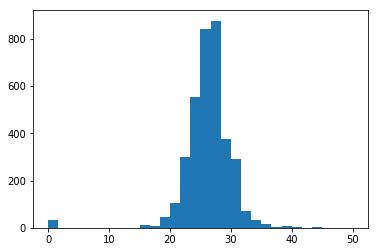

In [56]:
#plt.hist(np.log1p(dfs['takeaways-per-game_currseason']), bins=30)
plt.hist(np.square(dfs['opponent-third-downs-per-game_currseason']), bins=30)

dfs['opponent-third-downs-per-game_currseason'] = np.square(dfs['opponent-third-downs-per-game_currseason'])

#x = np.log1p(dfs['wind'])
#plt.hist(x, bins=10)
#dfs2 = np.power(dfs['wind'],.3)

In [ ]:
#plt.hist((dfs2), bins=30)

param = stats.norm.fit((dfs2))  
x = np.linspace(0, 20, 100)
pdf_fitted = stats.norm.pdf(x, *param)

plt.plot(x, pdf_fitted, color='r')

In [57]:
from sklearn import preprocessing
normalized_x = preprocessing.scale(x)

In [58]:
dfs2=pd.DataFrame(normalized_x)

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()

In [60]:
x_scaled = min_max_scaler.fit_transform(x)

In [61]:
dfs2 = pd.DataFrame(x_scaled)

In [62]:
dfs2.columns = ['ha','outdoors','dome','grass','temp','wind','spread','ou','implied','points-per-game_currseason',
'points-per-game_lastseason','red-zone-scoring-attempts-per-game_currseason','red-zone-scoring-attempts-per-game_lastseason',
'opponent-red-zone-scoring-attempts-per-game_currseason','opponent-red-zone-scoring-attempts-per-game_lastseason',
'opponent-points-per-game_currseason','opponent-points-per-game_lastseason','yards-per-game_currseason',
'yards-per-game_lastseason','opponent-yards-per-game_currseason','opponent-yards-per-game_lastseason',
'first-downs-per-game_currseason','first-downs-per-game_lastseason','third-downs-per-game_currseason',
'third-downs-per-game_lastseason','third-down-conversions-per-game_currseason','third-down-conversions-per-game_lastseason',
'opponent-first-downs-per-game_currseason','opponent-first-downs-per-game_lastseason','opponent-third-downs-per-game_currseason',
'opponent-third-downs-per-game_lastseason','opponent-third-down-conversions-per-game_currseason',
'opponent-third-down-conversions-per-game_lastseason','third-down-conversion-percentage_currseason',
'third-down-conversion-percentage_lastseason','opponent-third-down-conversion-percentage_currseason',
'opponent-third-down-conversion-percentage_lastseason'
]

In [ ]:
display(dfs2.corr())
pd.plotting.scatter_matrix(dfs2, figsize=(12, 12))
plt.show()

In [ ]:
dfs2.to_csv('/Users/User1/ml-seed-data/full_data_normal.csv', sep='|')

In [63]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [64]:
from sklearn.linear_model import LinearRegression

#x = dfs2.drop('fga', axis=1)

x = dfs2[:3583]
t = dfs2[3584:]
x = x.astype('object')

y = df['fga'].iloc[:3583]
yt = df['fga'].iloc[3584:]

In [ ]:
lm = LinearRegression()

lm.fit(x, y)

In [ ]:
print('Estimated Intercept Coefficient:' , lm.intercept_)

In [ ]:
print('Number of Coefficients:' , len(lm.coef_))

In [ ]:
pd.DataFrame(list(zip(x.columns,lm.coef_)), columns=['features','estimatedCoefficients'])

In [ ]:
plt.scatter(dfs2['implied'],df['fga'])
plt.xlabel('ou')
plt.ylabel('Field Goals Attempted')
plt.show

In [ ]:
plt.scatter(lm.predict(x),y)
plt.ylabel('Field Goals Attempted')
plt.xlabel('Predicted Field Goals Attempted')
plt.show

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 37)
(2400,)
(1183, 37)
(1183,)


In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)


pred_train = lin_reg_2.predict(poly_reg.fit_transform(x_train))
pred_test = lin_reg_2.predict(poly_reg.fit_transform(x_test))


In [69]:
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train-lin_reg_2.predict(poly_reg.fit_transform(x_train))) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test-lin_reg_2.predict(poly_reg.fit_transform(x_test))) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.4098814737020682
Fit a model X_train, and calculate MSE with X_test, Y_test: 1.4848906018425627


In [70]:
plt.scatter(lm.predict(x_train), lin_reg_2.predict(poly_reg.fit_transform(x_train)) - y_train, c='b', s=10, alpha = 0.5)
plt.scatter(lm.predict(x_test), lin_reg_2.predict(poly_reg.fit_transform(x_test)) - y_test, c='g', s=10)
plt.hlines(y=0, xmin=0, xmax=.6)

NameError: name 'lm' is not defined

In [ ]:
pre = dfs2.iloc[3584:]
df['fga'].iloc[3584:]

In [ ]:
pred_train = lin_reg_2.predict(poly_reg.fit_transform(x_train))
pred_test = lin_reg_2.predict(poly_reg.fit_transform(pre))

In [ ]:
df6=pd.DataFrame(pred_test)

In [ ]:
df6

In [ ]:
df6.to_csv('scores3.csv', sep='|')

In [ ]:
df6.to_csv('scores3.csv', sep='|')

In [ ]:
x.iloc[3584:]

In [ ]:
r2_score(df['fga'].iloc[3552:],df6)